<a href="https://colab.research.google.com/github/present42/PyTorchPractice/blob/main/prml/PRML_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3. Linear Models for Regression

## Section 3.2. The Bias-Variance Decomposition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gt(x):
  return np.sin(2 * np.pi * x)

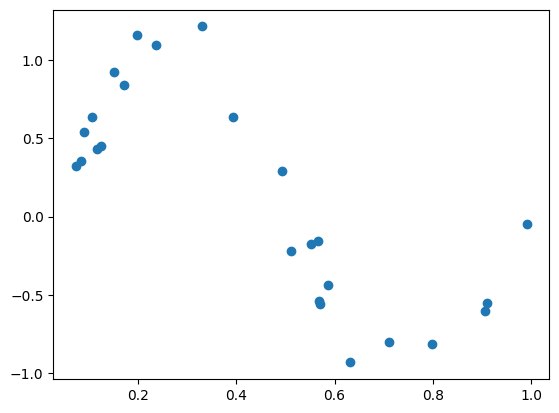

In [ ]:
# generate L = 100 data sets each containing N = 25 data points
L = 100
N = 25

inputs = [] # will have a shape of (L, N)
targets = []

for i in range(L):
  inp = np.random.uniform(size=N)
  out = np.sin(2 * np.pi * inp) + np.random.normal(scale=0.3, size=N)
  inputs.append(inp)
  targets.append(out)

plt.scatter(inp, out)

In [ ]:
def gaussian_kernel(x, loc, scale=1/24):
  return np.exp(-(x - loc) ** 2 / (2 * scale ** 2))

In [ ]:
def kernel(x):
  """ convert scalar input x of (1, ) to output phi(x) of (M, )"""
  locs = np.linspace(-0.5, 1.5, 24)
  out = [1]
  for loc in locs:
    out.append(gaussian_kernel(x, loc))
  return np.array(out)

In [ ]:
kernel(0)

array([1.00000000e+000, 5.38018616e-032, 4.58438766e-022, 5.01469587e-014,
       7.04185528e-008, 1.26943019e-003, 2.93771583e-001, 8.72750238e-001,
       3.32850643e-002, 1.62962642e-005, 1.02424993e-010, 8.26424271e-018,
       8.56011137e-027, 1.13824303e-037, 1.94298664e-050, 4.25778632e-065,
       1.19778023e-081, 4.32563283e-100, 2.00540178e-120, 1.19352734e-142,
       9.11890263e-167, 8.94400468e-193, 1.12616153e-220, 1.82032357e-250,
       3.77724997e-282])

In [ ]:
def input_to_design(inputs, kernel):
  """ convert input of shape (N, ) to design matrices of shape (N, M) using `kernel` transformation """
  out = []
  for input in inputs:
    out.append(kernel(input))
  out = np.vstack(out)
  return out

In [ ]:
phi = input_to_design(inputs[0], kernel)
phi.shape

(25, 25)

In [ ]:
def w_mle(targets, design_matrix, lambd=13.463738):
  """ computes mle solution for w using `targets` with regularizing coefficient lambd
  Args:
    - targets: (N, )
    - design_matrix: (N, M)
    - lambd: scalar

  Returns:
    - w: (M, )

  """
  N, M = design_matrix.shape
  res = np.linalg.inv(lambd * np.eye(M) + design_matrix.T @ design_matrix) @ design_matrix.T @ targets[:, np.newaxis]
  return res.reshape(-1)

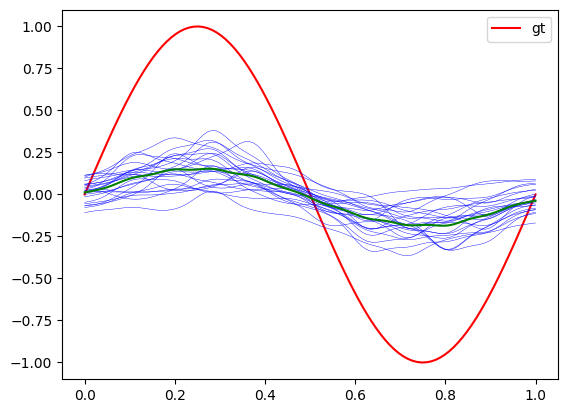

In [ ]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

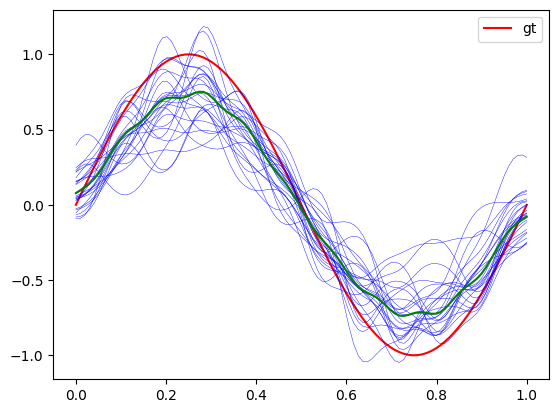

In [ ]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi, lambd=0.7334) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

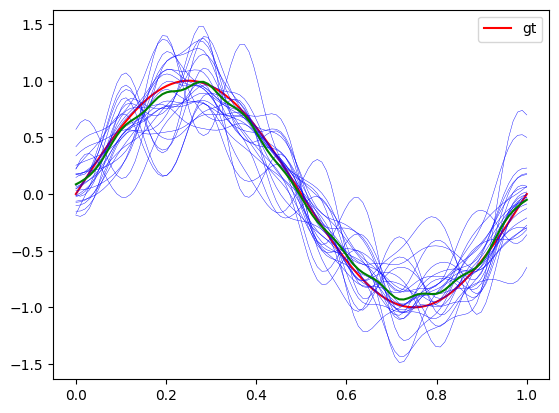

In [ ]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi, lambd=0.0907) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

# TODO: add a plot for bias, variance

## Section 3.3. Bayesian Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Goal: recover $a_0$ and $a_1$

In [51]:
alpha = 2.0
beta = 1 / (0.2 ** 2)

In [52]:
# a_0 = -0.3
# a_1 = 0.5
def lin_gt(x):
  return -0.3 + 0.5 * x

Here, we assume the noise variance is known (Here, precision is $\frac{1}{\beta^2}=25$). Similarly, we fix the parameter $\alpha=2.0$.

What we have to plot:
 1. posterior distribution of $w$ after observing $n$ data points. ($n = 0, 1, 2, 20$)
 2. six samples of line by sampling $w$ six times.
 3.

3

In [72]:
xs = np.random.uniform(-1, 1, size=20)
ts = lin_gt(xs)
err = np.random.normal(scale=0.2, size=20)
ts = ts + err
def input_to_polynomial_design_matrix(inputs, deg=1):
  """ construct a design matrix of size (N, deg + 1) using polynomial kernels (0, ..., deg)
      from input data of size (N, )
  """

  deg = int(deg)

  res = []
  for x in inputs:
    res.append([x ** i for i in range(deg + 1)])
  return np.array(res)

Dataset Overview

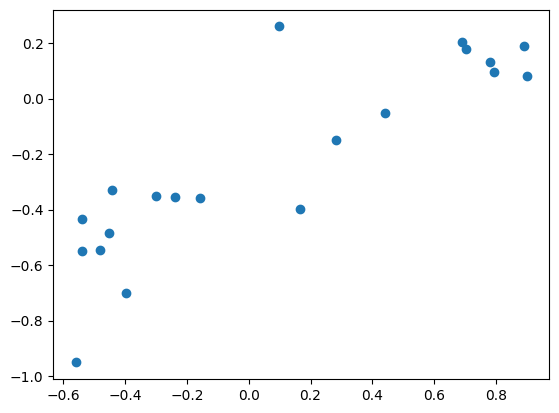

In [73]:
plt.scatter(xs, ts)
# plt.scatter(xs, ts + err)

In [74]:
xs_polynomial_design = input_to_polynomial_design_matrix(xs)

Plotting Prior Distribution ($n$ = 1)

In [84]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

def plot_gaussian_distribution(mu, sigma):
  # Our 2-dimensional distribution will be over variables X and Y
  N = 40
  X = np.linspace(-1, 1, N)
  Y = np.linspace(-1, 1, N)
  X, Y = np.meshgrid(X, Y)

  # Pack X and Y into a single 3-dimensional array
  pos = np.empty(X.shape + (2,))
  pos[:, :, 0] = X
  pos[:, :, 1] = Y

  # The distribution on the variables X, Y packed into pos.
  Z = multivariate_gaussian(pos, mu, sigma)

  # plot using subplots
  fig = plt.figure()
  ax1 = fig.add_subplot(2,2,1,projection='3d')

  ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                  cmap=cm.viridis)
  ax1.view_init(55,-70)
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.set_zticks([])
  ax1.set_xlabel(r'$w_0$')
  ax1.set_ylabel(r'$w_1$')

  ax2 = fig.add_subplot(2,2,2,projection='3d')
  ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
  ax2.view_init(90, 270)

  ax2.grid(False)
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax2.set_zticks([])
  ax2.set_xlabel(r'$w_0$')
  ax2.set_ylabel(r'$w_1$')

  plt.show()

## TODO: Add a fcn to draw plots for likelihood for each data point

Prior Distribution of $w$

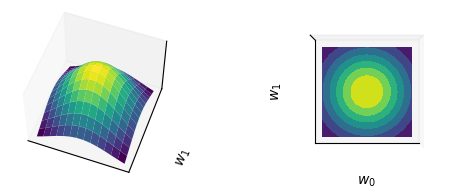

In [85]:
mu = np.array([0.0, 0.0])
sigma = (1.0 / alpha) * np.eye(2)

plot_gaussian_distribution(mu, sigma)

After observing 1 data points, the posterior distribution of w shifts: 



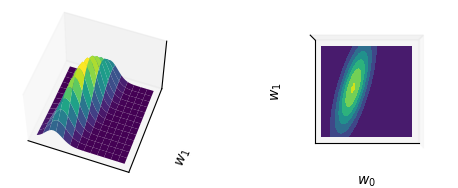

Sampling 6 pairs of (w0, w1) & 1 data points: 



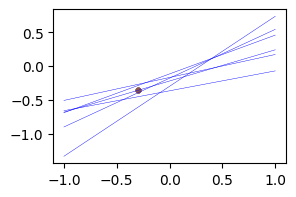





After observing 2 data points, the posterior distribution of w shifts: 



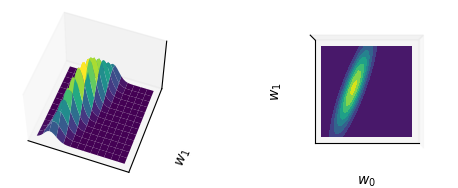

Sampling 6 pairs of (w0, w1) & 2 data points: 



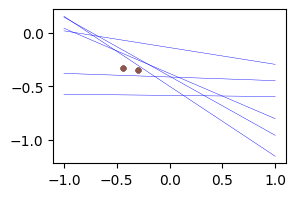





After observing 5 data points, the posterior distribution of w shifts: 



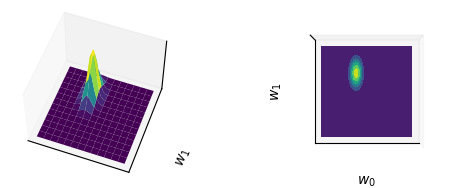

Sampling 6 pairs of (w0, w1) & 5 data points: 



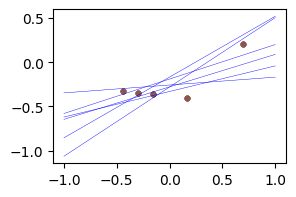





After observing 10 data points, the posterior distribution of w shifts: 



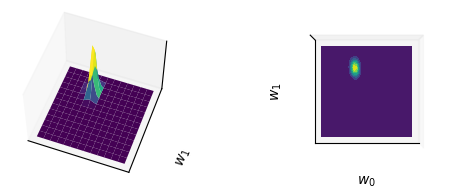

Sampling 6 pairs of (w0, w1) & 10 data points: 



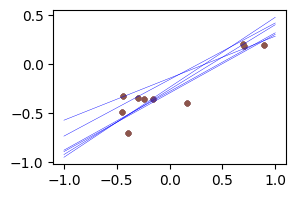





After observing 20 data points, the posterior distribution of w shifts: 



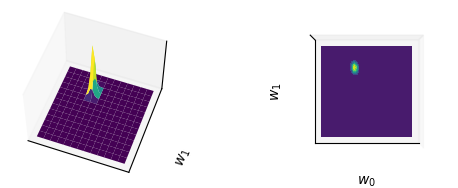

Sampling 6 pairs of (w0, w1) & 20 data points: 



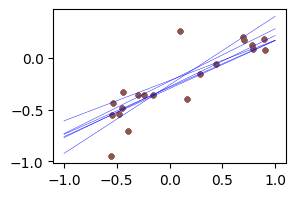

In [89]:
ns = [1, 2, 5, 10, 20]

for n in ns:
  # first method: recompute using all previous data points
  prec_new = alpha * np.eye(2) + beta * xs_polynomial_design[:n, ...].T @ xs_polynomial_design[:n, ...]
  sigma = np.linalg.inv(prec_new)
  mu_new = beta * sigma @ xs_polynomial_design[:n, ...].T @ ts[:n, np.newaxis]

  coeffs = np.random.multivariate_normal(mean=mu_new.flatten(), cov=sigma, size=6) # (6, 2)

  ins = np.linspace(-1, 1, 10)

  print(f"After observing {n} data points, the posterior distribution of w shifts: \n")
  plot_gaussian_distribution(mu_new.flatten(), sigma)

  print(f"Sampling 6 pairs of (w0, w1) & {n} data points: \n")
  plt.figure(figsize=(3, 2))
  for i in range(coeffs.shape[0]):
    plt.plot(ins, coeffs[i][0] + ins * coeffs[i][1], 'b', linewidth=0.3)
    plt.scatter(xs[:n], ts[:n], s=10, marker='o')
  plt.show()

  print("===========================================\n\n\n\n")

